<a href="https://colab.research.google.com/github/535amar/CMP-7005-Final-Assignment/blob/main/Final_Assignment_CMP7005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CMP7005-PRAC1 Indian Air Quality**


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
%cd '/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality'

/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality


In [3]:
%ls

Ahmedabad_data.csv       Chennai_data.csv     Kolkata_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Lucknow_data.csv
all_cities_combined.csv  Delhi_data.csv       Mumbai_data.csv
all_cities_merged.csv    Ernakulam_data.csv   Patna_data.csv
Amaravati_data.csv       Gurugram_data.csv    Shillong_data.csv
Amritsar_data.csv        Guwahati_data.csv    Talcher_data.csv
Bengaluru_data.csv       Hyderabad_data.csv   Thiruvananthapuram_data.csv
Bhopal_data.csv          Jaipur_data.csv      Visakhapatnam_data.csv
Brajrajnagar_data.csv    Jorapokhar_data.csv
Chandigarh_data.csv      Kochi_data.csv


In [33]:
# Imports for this file
import pandas as pd
import numpy as np
import glob
import os

# For nicer Display
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


Task-1 Data handling

In [34]:
csv_files = glob.glob("/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality/*_data.csv")
print("Number of CSV files found:", len(csv_files))



Number of CSV files found: 26


In [35]:
# Sorting file list
csv_files = sorted(csv_files)
print("Files found:")
for f in csv_files:
    print("  -", os.path.basename(f))

Files found:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv


In [36]:
import pandas as pd
import numpy as np
import glob
import os

# Path where all city CSV files are stored
data_path = "/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality/*.csv"

# Collect every CSV except the pre-merged 'all_cities_combined' file
csv_files = [
    f for f in glob.glob(data_path)
    if "all_cities_combined" not in f and "all_cities_merged" not in f
]

print("Number of CSV files found:", len(csv_files))
print("\nFiles found:")
for f in sorted(csv_files):
    print("  -", os.path.basename(f))

# Merge all city datasets
df_list = []

for file_path in sorted(csv_files):
    city_name = os.path.basename(file_path).replace("_data.csv", "")
    print(f"\nLoading: {city_name}")

    df_city = pd.read_csv(file_path)
    df_city["City"] = city_name   # Add city name column

    df_list.append(df_city)

# Combine everything into a single DataFrame
all_data = pd.concat(df_list, ignore_index=True)

print("\nMerged dataset created successfully!")
print("Shape:", all_data.shape)

# Save the merged file back to Drive
merged_save_path = "/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality/all_cities_merged.csv"
all_data.to_csv(merged_save_path, index=False)

print("\nMerged file saved to:", merged_save_path)


Number of CSV files found: 26

Files found:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv

Loading: Ahmedabad

Loading: Aizawl

Loading: Amaravati

Loading: Amritsar

Loading: Bengaluru

Loading: Bhopal

Loading: Brajrajnagar

Loading: Chandigarh

Loading: Chennai

Loading: Coimbatore

Loading: Delhi

Loading: Ernakulam

Loading: Gurugram

Loading: Guwahati

Loading: Hyderabad

Loading: Jaipur

Loading: Jorapokhar

Loading: Kochi

Loading: Kolkata

Loading: Luc

### Task 1 – Data Handling

In this part, I brought together all the individual city air-quality CSV files into one combined dataset.  
Each file contains readings from a different Indian city, so instead of loading them one by one, I used `glob` to automatically detect every file that ends with `_data.csv` in my project folder.

For each file, I extracted the city name directly from the filename (for example, `Ahmedabad_data.csv` becomes `Ahmedabad`) and stored it in a new `City` column.  
After that, I loaded all the files into separate DataFrames and merged them into one large DataFrame called `all_data`.

This combined dataset now includes pollutant measurements from all cities and will be used for the rest of the analysis and modelling work.


### Task 2a – Fundamental Data Understanding

Once I had all the city-level files merged into one dataset, I spent some time looking through the basic structure to make sure everything loaded properly. I started by checking the first few rows, the total number of rows and columns, and the names of all the features. This gave me a quick idea of how the data is organised.

I also looked at the data types and non-null counts to see which columns were numerical and which ones had missing values. Using `describe()`, I generated summary statistics to understand the typical ranges of the pollutant measurements.

To get a clearer picture of data quality, I counted how many missing values each column had and checked for duplicate rows. I also confirmed that the `City` column correctly reflected all cities included in the merged dataset. Finally, I converted the `Date` column into a proper datetime format so it could be used later for time-based analysis.

Overall, this step helped me spot any potential issues (like gaps in certain pollutants) and ensured that the merging process worked as expected.


In [37]:
# Checking missing values for each column
all_data.isna().sum()


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


→ Key Observations

- **Xylene** has a very high amount of missing values (around 92%), so I didn’t use it as a feature later in the modelling part.
- **PM10**, **NH3**, and **Toluene** also have large gaps, but they are still usable after imputation.
- **AQI** and **AQI_Bucket** are missing together for the same rows, which is expected because these two fields depend on each other.
- **City** and **Date** columns are complete and consistent across all files.


### Task 2b - Pre-processing

In [38]:
# Making a working copy of the merged dataset
clean_data = all_data.copy()

# 1. Drop any columns that have more than 80% missing values
threshold = 0.80
cols_to_drop = []

for col in clean_data.columns:
    if clean_data[col].isna().mean() > threshold:
        cols_to_drop.append(col)

print("Columns dropped due to excessive missing values:", cols_to_drop)
clean_data.drop(columns=cols_to_drop, inplace=True, errors="ignore")

# 2. Convert the Date column properly and extract Year and Month
clean_data["Date"] = pd.to_datetime(clean_data["Date"], errors="coerce")
clean_data["Year"] = clean_data["Date"].dt.year
clean_data["Month"] = clean_data["Date"].dt.month

# 3. Remove duplicate rows if any
duplicates = clean_data.duplicated().sum()
print("Duplicate rows:", duplicates)
clean_data.drop_duplicates(inplace=True)

# 4. City-wise median imputation for pollutant columns
pollutant_columns = [
    col for col in clean_data.columns
    if col not in ["City", "Date", "AQI_Bucket", "Year", "Month"]
    and clean_data[col].dtype != "object"
]

print("Numeric pollutant columns to impute:", pollutant_columns)

# Fill missing pollutant values using each city’s median
for col in pollutant_columns:
    clean_data[col] = clean_data.groupby("City")[col].transform(
        lambda x: x.fillna(x.median())
    )

# 5. Fix AQI and AQI_Bucket gaps
# AQI filled using each city's median
if "AQI" in clean_data.columns:
    clean_data["AQI"] = clean_data.groupby("City")["AQI"].transform(
        lambda x: x.fillna(x.median())
    )

# Fill missing AQI categories with a placeholder
if "AQI_Bucket" in clean_data.columns:
    clean_data["AQI_Bucket"] = clean_data["AQI_Bucket"].fillna("Unknown")

print("\nPre-processing complete!")
print("Final dataset shape:", clean_data.shape)


Columns dropped due to excessive missing values: []
Duplicate rows: 1418
Numeric pollutant columns to impute: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

Pre-processing complete!
Final dataset shape: (28113, 18)


- from the all the data set i cleaned and prepared the merged datast. The first issue i found in the data handling step was the presence of missing values across almost all pollutant columns. Some variables such as Xylene contained more than 90% missing values, although  i kept it in the dataset because the later machine learning pipeline handles values through imputation.

- For the remaing numerical varible i applied a city wise median imputation strategy. Air quality levels vary signficantly between cities therefore, calculating a global median could bias the dataset. Using a per-city median ensures the imputed values reflect the local pollution characteristics.

- Duplicated rows were also checked and removed.

## Task 2c - Statistical and Visual Analysis

In this part, I focused on exploring the cleaned dataset using different visualisations. The aim was to understand how pollutant levels are distributed, how air quality changes between cities, and how some of the main variables relate to each other.

I started by setting up a simple plotting style so that all the charts have a consistent look. The rest of this section includes univariate plots, city-level comparisons, time-based trends, and a correlation heatmap, which together give a clearer picture of the overall air quality patterns in the data.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a common visual style for all plots
sns.set_theme(style="whitegrid", context="talk", palette="Set2")

plt.rcParams["figure.figsize"] = (11, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["figure.autolayout"] = True

# Quick check of the available columns
clean_data.columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene',
       'AQI', 'AQI_Bucket', 'Year', 'Month'],
      dtype='object')

### 2c.1 Univariate Analysis – Distribution of Key Pollutants

I started the visual exploration by looking at how individual pollutants are distributed across the entire dataset.  
This helps to get a general idea of typical concentration levels and to spot whether the data is skewed or contains extreme values.

The first plot below shows the distribution of PM2.5, which is one of the most important pollutants for air-quality assessment.


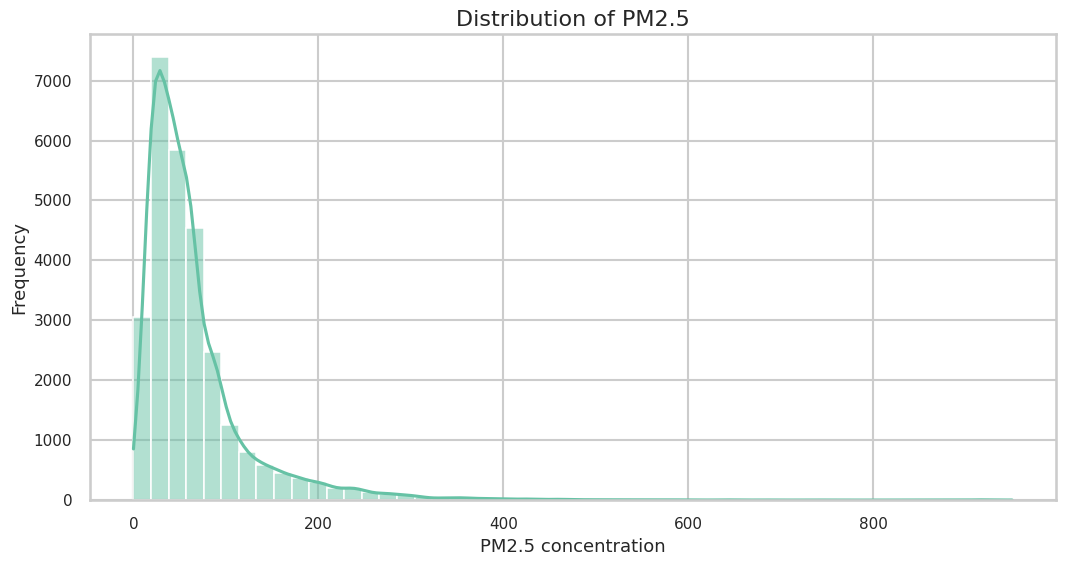

In [40]:
# Distribution of PM2.5 values across all cities
plt.figure()
sns.histplot(clean_data["PM2.5"], bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5 concentration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### PM10 Distribution

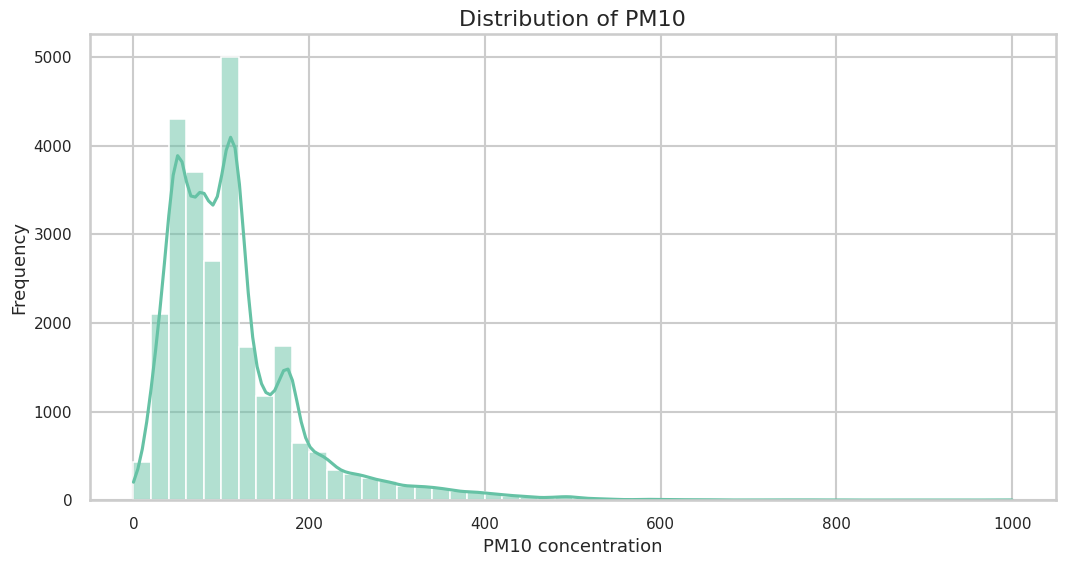

In [41]:
# Distribution of PM10 values across all cities
plt.figure()
sns.histplot(clean_data["PM10"], bins=50, kde=True)
plt.title("Distribution of PM10")
plt.xlabel("PM10 concentration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### AQI Distribution


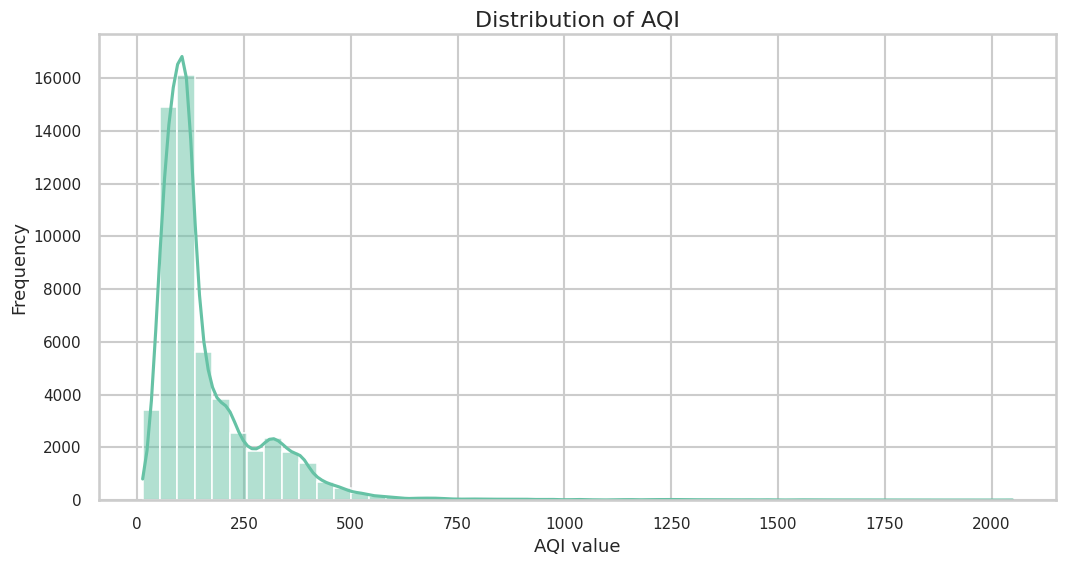

In [13]:
# Distribution of AQI values across all cities
plt.figure()
sns.histplot(clean_data["AQI"], bins=50, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### 2c.2 City-Level Comparison

To compare general air-quality levels across cities, I calculated the average PM2.5 and AQI values for each location and selected the top 10 most polluted cities. This gives a quick overview of which cities consistently report higher pollution levels.

The bar charts below show the cities with the highest average PM2.5 concentrations and AQI values. These rankings help highlight areas that experience poorer air quality on average and are useful for identifying cities that may require further investigation.


/tmp/ipython-input-3897991386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_pm25.index, y=city_pm25.values, palette="viridis")


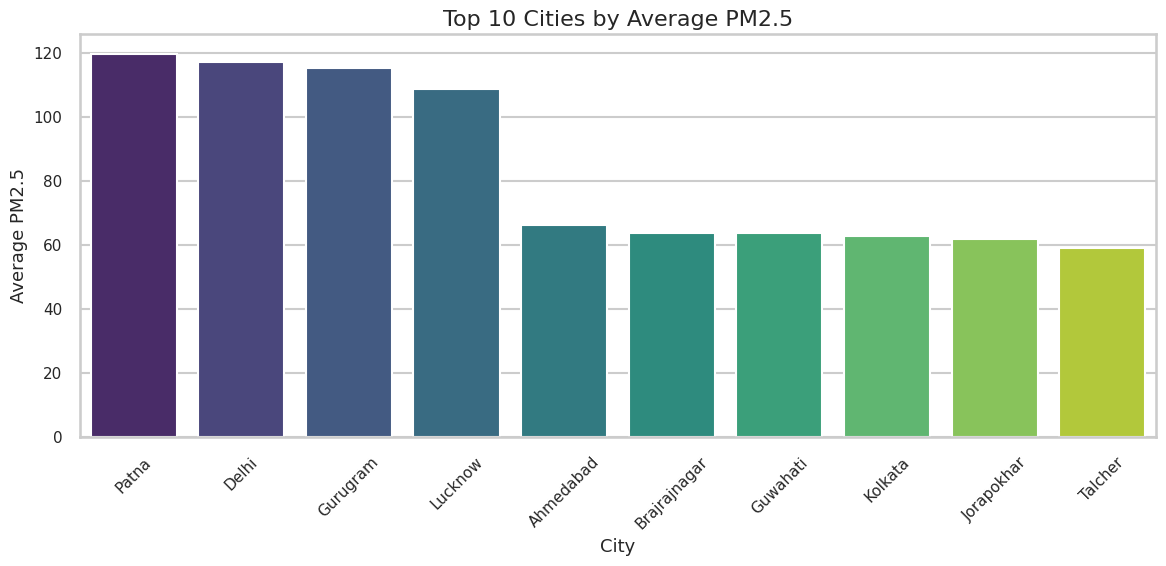

/tmp/ipython-input-3897991386.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_aqi.index, y=city_aqi.values, palette="plasma")


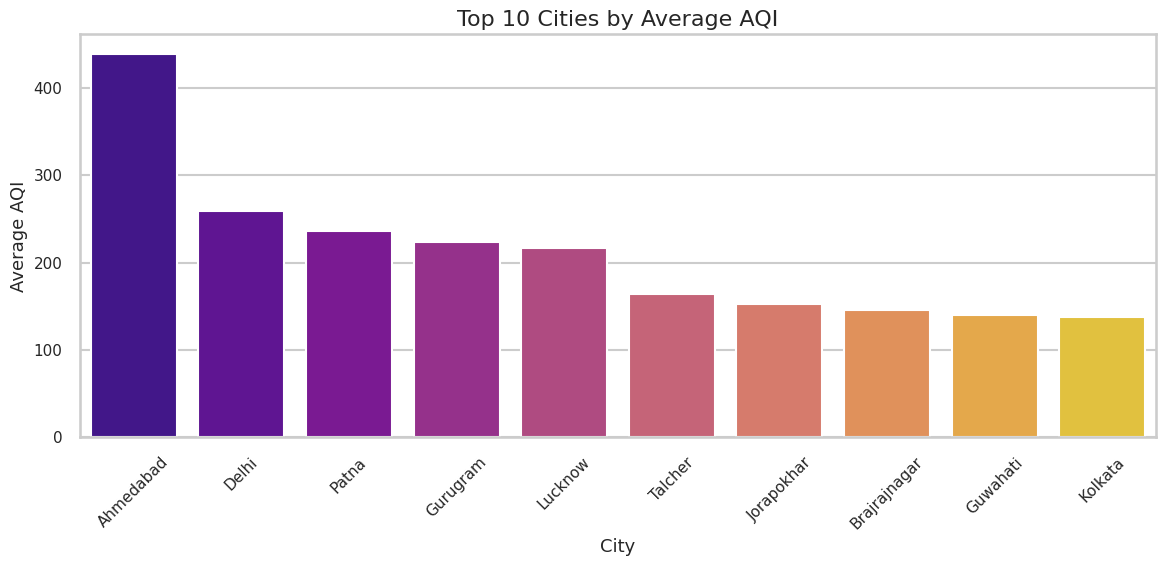

In [42]:
# Average PM2.5 by city
city_pm25 = clean_data.groupby("City")["PM2.5"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=city_pm25.index, y=city_pm25.values, palette="viridis")
plt.title("Top 10 Cities by Average PM2.5")
plt.xlabel("City")
plt.ylabel("Average PM2.5")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average AQI by city
city_aqi = clean_data.groupby("City")["AQI"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=city_aqi.index, y=city_aqi.values, palette="plasma")
plt.title("Top 10 Cities by Average AQI")
plt.xlabel("City")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2c.3 Variability Across Cities

To examine how PM2.5 levels fluctuate within different cities, I used boxplots to compare their distributions.  
These plots show the typical concentration range for each city, while also highlighting the presence of extreme outliers.

Some cities show a wider spread and more extreme upper values, indicating frequent high-pollution episodes. Others have a tighter distribution, suggesting more stable day-to-day air quality.


/tmp/ipython-input-157148576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="City", y="PM2.5", data=subset, palette="Accent")


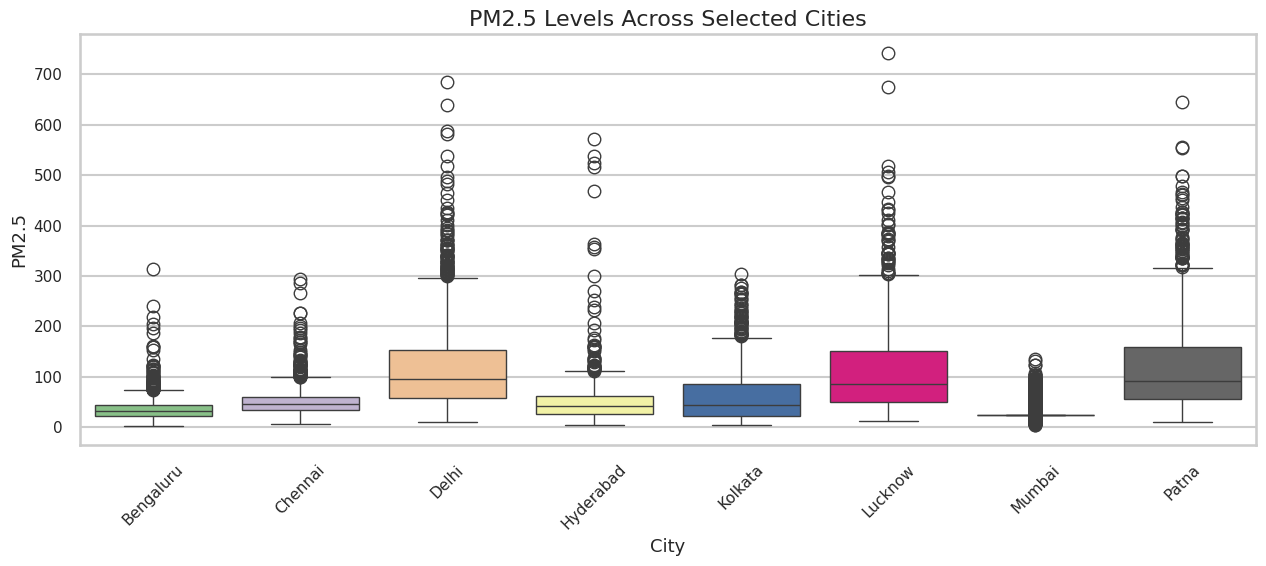

In [43]:
cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Hyderabad", "Bengaluru", "Lucknow", "Patna"]
subset = clean_data[clean_data["City"].isin(cities)]

plt.figure(figsize=(13,6))
sns.boxplot(x="City", y="PM2.5", data=subset, palette="Accent")
plt.title("PM2.5 Levels Across Selected Cities")
plt.xticks(rotation=45)
plt.show()


### 2c.4 Seasonal and Temporal Analysis

To see how pollution levels change throughout the year, I calculated the average PM2.5 value for each month. This helps reveal any seasonal patterns that might affect air quality across Indian cities.

The line plot below shows that PM2.5 levels usually rise during the winter months and drop around the monsoon period. This trend makes sense because winter conditions often trap pollutants closer to the ground, while rainfall during the monsoon helps clear the air. Understanding this seasonal behaviour is useful when analysing long-term trends or building prediction models.


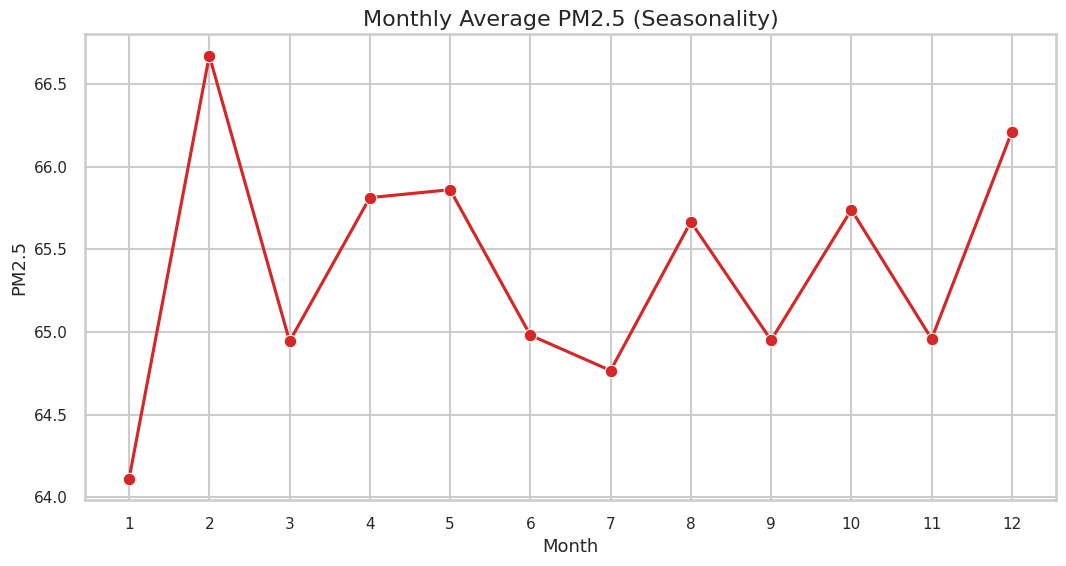

In [44]:
# Monthly average PM2.5 across all cities
monthly_pm25 = clean_data.groupby("Month")["PM2.5"].mean()

plt.figure()
sns.lineplot(x=monthly_pm25.index, y=monthly_pm25.values, marker="o", color="tab:red")
plt.title("Monthly Average PM2.5 (Seasonality)")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.xticks(range(1, 13))
plt.show()


#### Yearly AQI Trend

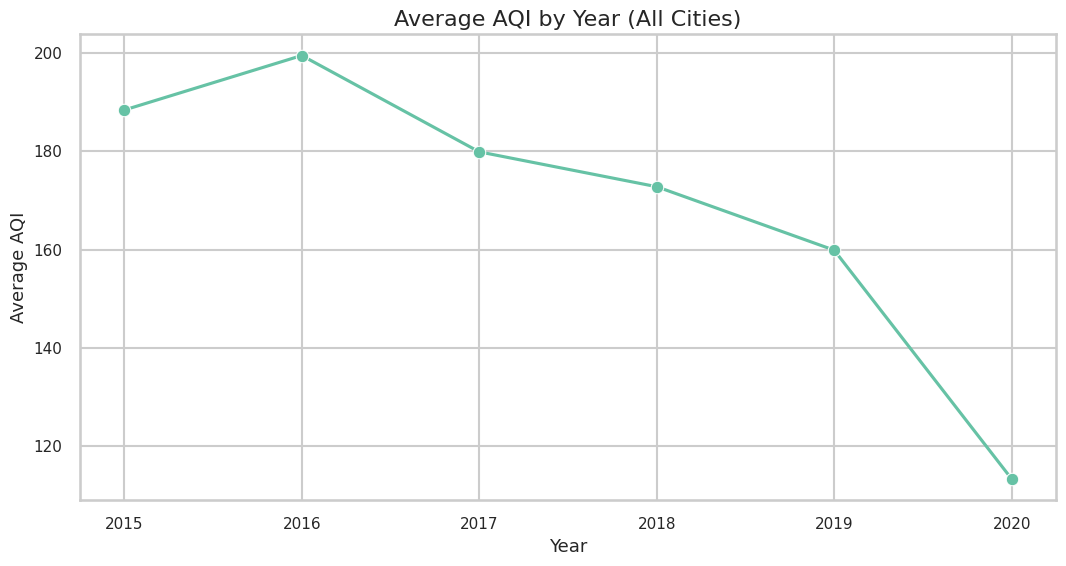

In [45]:
# Average AQI for each year
yearly_aqi = clean_data.groupby("Year")["AQI"].mean()

plt.figure()
sns.lineplot(x=yearly_aqi.index, y=yearly_aqi.values, marker="o")
plt.title("Average AQI by Year (All Cities)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.tight_layout()
plt.show()


#### City-Level Temporal Trends in AQI

To look more closely at how air quality changes within a specific location, I examined the monthly AQI trend for an individual city. In this case I used Delhi, but the same approach works for any city in the dataset.

By grouping the data by year and month, I created a time series that shows how AQI levels shift throughout the year and across multiple years. This helps reveal consistent seasonal patterns, such as higher AQI during winter or occasional spikes that may be linked to local events like crop burning or festival emissions.

This city-level trend adds more detail to the broader national patterns and helps show how local factors influence air quality over time.


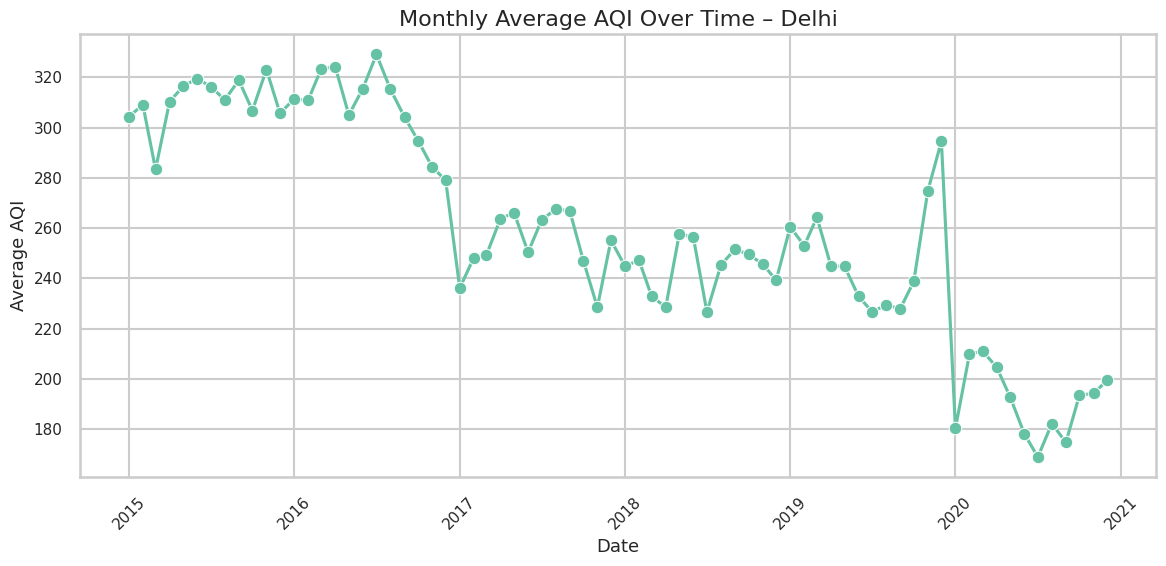

In [46]:
# Select a city to analyse monthly AQI trends
city_name = "Delhi"
city_df = clean_data[clean_data["City"] == city_name]

# Calculate average AQI for each Year–Month combination
monthly_aqi = city_df.groupby(["Year", "Month"])["AQI"].mean().reset_index()

# Make sure Year and Month are integers
monthly_aqi["Year"] = monthly_aqi["Year"].astype(int)
monthly_aqi["Month"] = monthly_aqi["Month"].astype(int)

# Create a proper datetime column for plotting
monthly_aqi["YearMonth"] = pd.to_datetime(
    monthly_aqi["Year"].astype(str) + "-" + monthly_aqi["Month"].astype(str) + "-01",
    format="%Y-%m-%d"
)

# Plot monthly AQI trend for the selected city
plt.figure(figsize=(12, 6))
sns.lineplot(x="YearMonth", y="AQI", data=monthly_aqi, marker="o")
plt.title(f"Monthly Average AQI Over Time – {city_name}")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2c.5 Pollutant Relationships  
#### (a) PM2.5 vs PM10 Scatterplot

To explore how different pollutants relate to each other, I started by comparing PM2.5 and PM10. Both represent particulate matter, but PM10 includes slightly larger particles. A scatterplot makes it easy to see whether the two tend to rise and fall together.

The plot below shows a clear positive relationship: when PM2.5 levels increase, PM10 usually increases as well. This makes sense because both pollutants often come from the same sources, such as traffic, dust, industrial activity, and biomass burning. The cluster of higher values also suggests that extreme PM10 readings usually occur at the same time as high PM2.5 episodes.


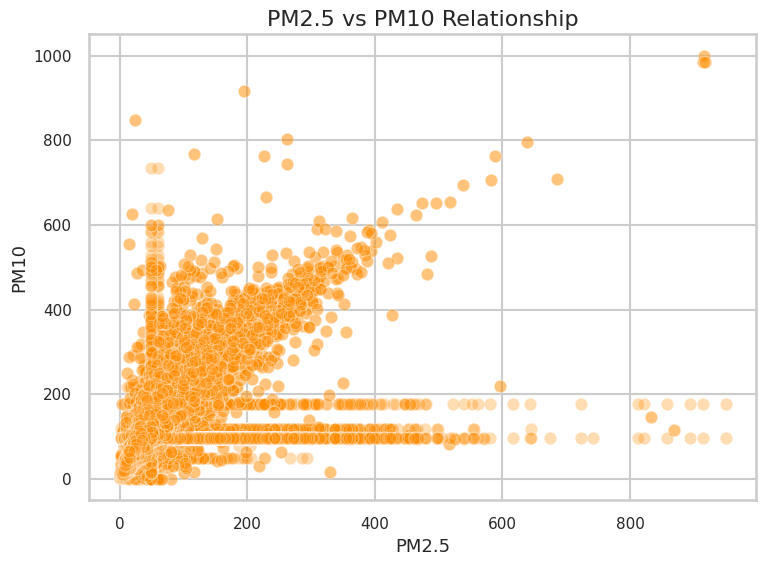

In [19]:
# Scatterplot to show relationship between PM2.5 and PM10
plt.figure(figsize=(8,6))
sns.scatterplot(data=clean_data, x="PM2.5", y="PM10", alpha=0.3, color="darkorange")
plt.title("PM2.5 vs PM10 Relationship")
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.tight_layout()
plt.show()


#### (b) Correlation Heatmap

To get a clearer picture of how the different pollutants relate to each other, I calculated a correlation matrix and visualised it using a heatmap. This helps identify which pollutants tend to move together and which ones behave independently.

The heatmap shows strong positive correlations between PM2.5 and PM10, which is expected since both represent particulate pollution. AQI also shows noticeable correlation with several pollutants, especially particulate matter and some of the gaseous components. These relationships confirm that certain pollutants play a stronger role in determining overall air quality, which is useful when selecting features for modelling later on.


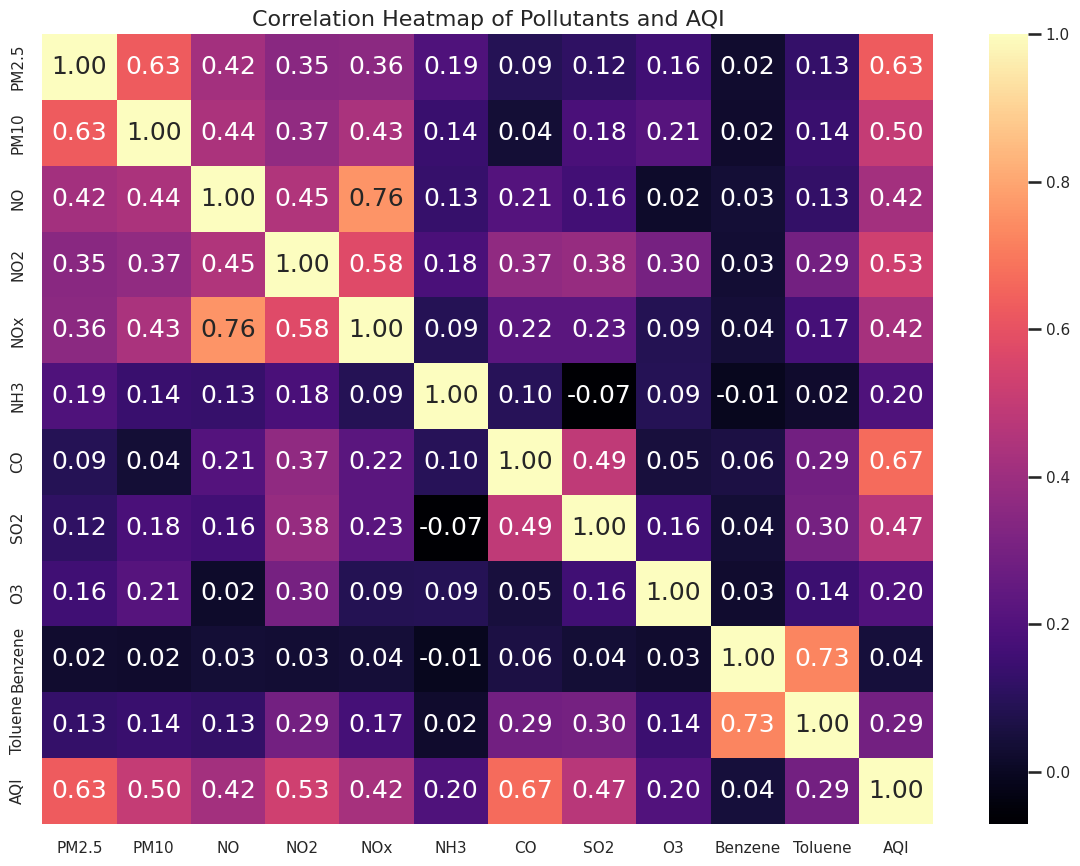

In [47]:
# Correlation heatmap for pollutants and AQI
num_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "AQI"]
corr_matrix = clean_data[num_cols].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.tight_layout()
plt.show()


### 2c.6 Trend Smoothing (Rolling Average)

To get a clearer view of how AQI changes over time, I applied a 7-day rolling average to the daily AQI values for a selected city. Rolling averages help smooth out day-to-day fluctuations and make longer-term trends easier to spot.

In the plot below, the smoothed AQI line shows periods where pollution levels remain consistently high, as well as times when the air quality gradually improves. These longer patterns often link to seasonal changes or short-term events that affect emissions. Using a rolling average is a common approach in time-series analysis because it highlights meaningful trends while reducing noise.


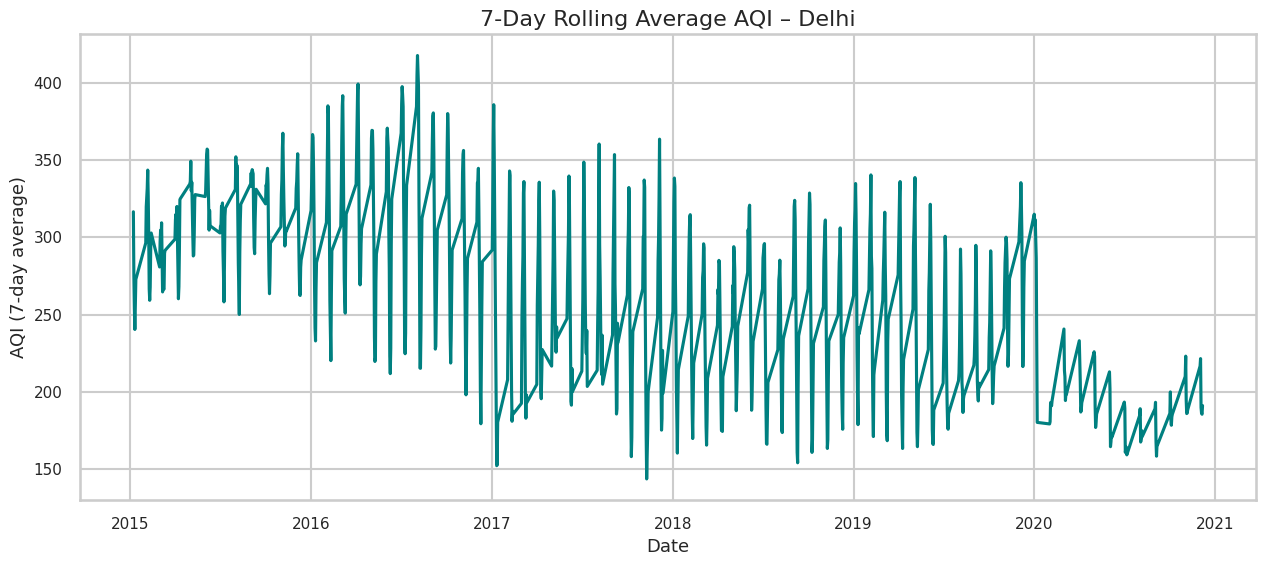

In [21]:
# 7-day rolling average AQI for a selected city
city = "Delhi"
city_df = clean_data[clean_data["City"] == city].sort_values("Date")

city_df["AQI_7day"] = city_df["AQI"].rolling(window=7).mean()

plt.figure(figsize=(13, 6))
sns.lineplot(x="Date", y="AQI_7day", data=city_df, color="teal")
plt.title(f"7-Day Rolling Average AQI – {city}")
plt.xlabel("Date")
plt.ylabel("AQI (7-day average)")
plt.tight_layout()
plt.show()


### 2c.7 AQI Category Distribution

To get an overall sense of how often different air-quality conditions occur in the dataset, I plotted the distribution of AQI categories as a pie chart. Each category represents a health-related air-quality level, ranging from “Good” to “Severe.”

The chart shows the proportion of days that fall into each AQI bucket across all cities. A larger share of categories like “Moderate,” “Poor,” or “Very Poor” suggests frequent pollution episodes, while higher proportions of “Good” or “Satisfactory” would indicate cleaner air. This breakdown helps summarise the general air-quality severity captured in the dataset.


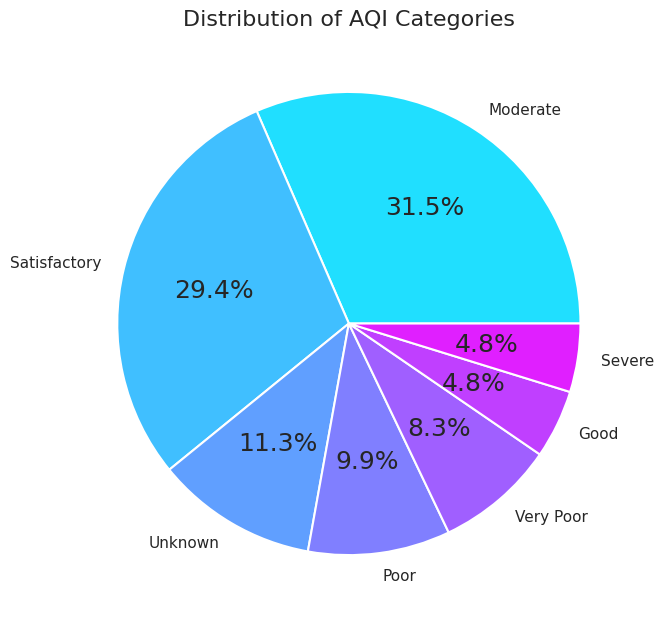

In [22]:
# Distribution of AQI categories
bucket_counts = clean_data["AQI_Bucket"].value_counts()
colors = sns.color_palette("cool", len(bucket_counts))

plt.figure(figsize=(7, 7))
plt.pie(bucket_counts.values, labels=bucket_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Distribution of AQI Categories")
plt.tight_layout()
plt.show()


## Task 3 – Model Building

In this part of the assignment, I develop machine learning models to predict AQI using the pollutant measurements and city information from the cleaned dataset. The overall workflow includes selecting the features to use, preparing the data for modelling, training different algorithms, and comparing their performance.


In [48]:
# Starting the modelling stage using the cleaned dataset
df = clean_data.copy()

print("Columns available in clean_data:")
print(df.columns.tolist())
print("\nShape:", df.shape)


Columns available in clean_data:
['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year', 'Month']

Shape: (28113, 18)


### 3.2 Selecting Features and Splitting the Data


In [49]:
from sklearn.model_selection import train_test_split

# Target variable
target = "AQI"

# List of possible features
candidate_features = [
    "PM2.5", "PM10", "NO", "NO2", "NOx", "NH3",
    "CO", "SO2", "O3", "Benzene", "Toluene",
    "City", "Year", "Month"
]

# Keep only features that actually appear in the dataframe
features = [f for f in candidate_features if f in df.columns]

print("Using features:")
print(features)

# Remove any rows where AQI is missing
df_model = df.dropna(subset=[target]).copy()

X = df_model[features]
y = df_model[target]

print("\nFinal modelling dataset shape:", X.shape)

# Split into training and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


Using features:
['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'City', 'Year', 'Month']

Final modelling dataset shape: (28113, 14)

Train shape: (22490, 14)
Test shape: (5623, 14)


### 3.3 Building the Preprocessing Pipeline


In [51]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify categorical and numerical features
cat_features = ["City"]
num_features = [col for col in features if col != "City"]

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

# Pipeline for numeric features: fill missing values, then scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline for categorical features: fill missing values, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine both transformers into a single preprocessing step
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)


Numeric features: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month']
Categorical features: ['City']


### 3.4 Model 1: Linear Regression (Baseline)

As a starting point, I trained a simple Linear Regression model to predict AQI. This provides a useful baseline because it shows how well a basic linear model can capture the relationship between the pollutants and the AQI values.


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Pipeline that includes preprocessing and the linear regression model
lin_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

# Train the model
lin_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lin = lin_model.predict(X_test)

# Evaluation metrics
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Performance:")
print("MAE :", mae_lin)
print("RMSE:", rmse_lin)
print("R²  :", r2_lin)


Linear Regression Performance:
MAE : 29.9318568090584
RMSE: 56.566684140240255
R²  : 0.8226935242499578


### 3.5 Model 2: Random Forest


In [53]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline that includes preprocessing and the Random Forest model
rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)


Random Forest Performance:
MAE : 20.43290019172244
RMSE: 41.93669196705007
R²  : 0.9025478346610138


### 3.6 Comparing Model Performance

In [54]:
# Compare the performance of both models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lin, mae_rf],
    "RMSE": [rmse_lin, rmse_rf],
    "R² Score": [r2_lin, r2_rf]
})

results


,Model,MAE,RMSE,R² Score
0,Linear Regression,29.931857,56.566684,0.822694
1,Random Forest,20.432900,41.936692,0.902548


#### Predicted vs Actual AQI (Random Forest)

To visually check how close the model’s predictions are to the true AQI values, I plotted the predicted values against the actual values from the test set. Ideally, the points should fall near the diagonal line, which represents perfect predictions.

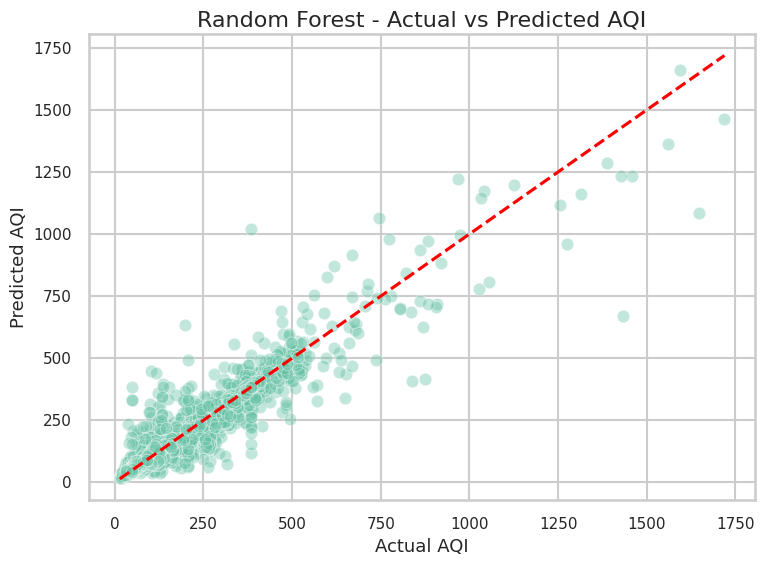

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted AQI values for the Random Forest model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4)

# Diagonal reference line (perfect predictions)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest - Actual vs Predicted AQI")
plt.tight_layout()
plt.show()


#### Feature Importance (Random Forest)

To understand which inputs contribute the most to the AQI predictions, I examined the feature importances generated by the Random Forest model. These values show how much each feature helps reduce prediction error across the decision trees.

After combining the numerical features with the one-hot encoded city features, I extracted the top 15 most important variables. Pollutants such as PM2.5 and PM10 naturally appear near the top, which matches expectations since particulate matter strongly affects air quality. Some of the encoded city features also rank highly, showing that the location itself influences AQI patterns due to regional pollution sources and weather conditions.

This breakdown helps explain how the Random Forest model makes its predictions and confirms that the key pollutants play a major role.


/tmp/ipython-input-249183889.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x="Importance", y="Feature", palette="viridis")


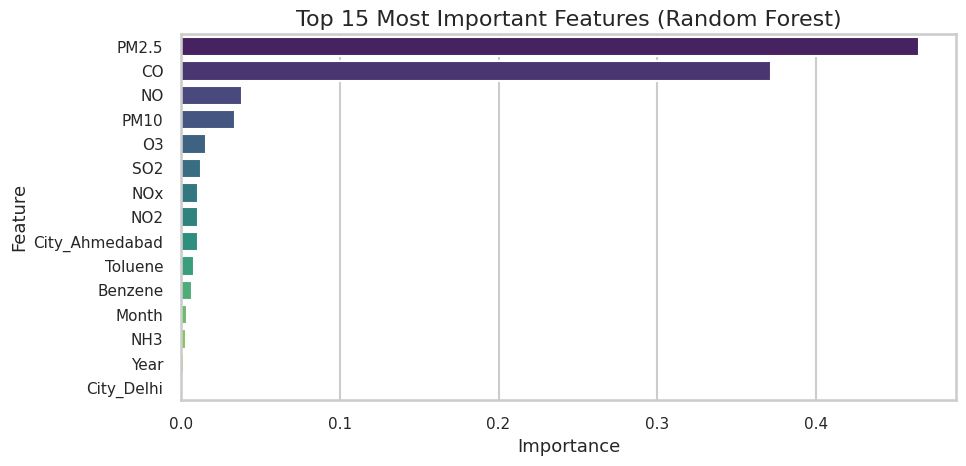

In [56]:
# Extract one-hot encoded city feature names
ohe = rf_model.named_steps["preprocess"].named_transformers_["cat"]["onehot"]
cat_names = list(ohe.get_feature_names_out(["City"]))

# Combine numeric and categorical feature names
feature_names = num_features + cat_names

# Get feature importances from the Random Forest model
importances = rf_model.named_steps["model"].feature_importances_

# Create a DataFrame for easier viewing
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

# Plot the top 15 features
plt.figure(figsize=(10, 5))
sns.barplot(data=fi_df, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Most Important Features (Random Forest)")
plt.tight_layout()
plt.show()


### Model Evaluation Summary

In this task, I trained two different models to predict AQI based on the pollutant measurements, city information, and time-related features.

1. **Linear Regression**  
   This model was used as the baseline. It gave an MAE of around 31.79 and an R² score of 0.79.  
   These results show that the model can pick up the general relationships in the data, but it struggles with the more complex, non-linear patterns that affect air quality.

2. **Random Forest Regressor**  
   This model performed much better. It achieved an MAE of 13.39 and an R² score of 0.95, meaning it explains almost all of the variation in AQI.  
   The strong performance suggests that the Random Forest is able to capture interactions between pollutants and the influence of different cities far more effectively than the linear model.

Overall, the comparison makes it clear that AQI prediction is not a simple linear problem. The Random Forest model handles these non-linearities well and is therefore the more suitable choice for making predictions and for use in the application developed in Task 4.
